In [ ]:
# import json
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import numpy as np
# from datasets import Dataset
# from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments, AutoConfig
# from sklearn.preprocessing import LabelEncoder
# import torch
# from sklearn.model_selection import train_test_split
#
# # Charger les données JSON
# with open("intents_dataset.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#
# texts = [item["text"] for item in data]
# labels = [item["intent"] for item in data]
#
# # Encoder les labels
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)
#
# # Créer le dataset HuggingFace
# dataset = Dataset.from_dict({"text": texts, "label": encoded_labels})
#
# # Séparer en train/test
# dataset = dataset.train_test_split(test_size=0.2)
#
# # Tokeniser avec DistilBERT
# tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)
#
# tokenized_datasets = dataset.map(tokenize_function, batched=True)
#
# # Calcul des poids des classes
# labels_array = np.array(tokenized_datasets["train"]["label"])
# class_counts = np.bincount(labels_array)
# class_weights = 1.0 / class_counts
# class_weights = class_weights / class_weights.sum()  # normalisation facultative
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
#
# # Modèle personnalisé avec loss pondérée
# from torch.nn import CrossEntropyLoss
#
# class WeightedLossDistilBert(DistilBertForSequenceClassification):
#     def __init__(self, config, class_weights):
#         super().__init__(config)
#         self.class_weights = class_weights
#         self.loss_fct = CrossEntropyLoss(weight=self.class_weights)
#
#     def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
#         outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         loss = None
#         if labels is not None:
#             self.class_weights = self.class_weights.to(logits.device)  # Move weights to GPU if needed
#             loss = self.loss_fct(logits, labels)
#         return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}
#
# # Charger config et modèle personnalisé
# num_labels = len(label_encoder.classes_)
# config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
# model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)
#
# # Définir les arguments d'entraînement
# training_args = TrainingArguments(
#     output_dir="./results3",
#     eval_strategy="epoch",
#     learning_rate=3e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=7,
#     weight_decay=0.1,
#     logging_dir='./logs3',
#     logging_steps=10,
#     report_to=["tensorboard"],
#     load_best_model_at_end=True,
#     metric_for_best_model="f1",
#     greater_is_better=True,
#     save_strategy="epoch"
# )
#
# # Fonction de métriques personnalisée
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     cm = confusion_matrix(labels, predictions).tolist()
#     return {
#         "accuracy": accuracy_score(labels, predictions),
#         "f1": f1_score(labels, predictions, average="weighted"),
#         "confusion_matrix": cm
#     }
#
# # Créer le trainer avec modèle pondéré
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["test"],
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics
# )
#
# # Entraîner
# trainer.train()
#
# # Sauvegarde du modèle et du tokenizer
# model.save_pretrained("fine-tuned-distilbert-intents3")
# tokenizer.save_pretrained("fine-tuned-distilbert-intents3")
#
# # Sauvegarde des classes
# with open("label_encoder.json", "w", encoding="utf-8") as f:
#     json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)


autre_question → 0
consult_actions → 1
consult_operations → 2
consult_solde → 3
demande_extrait → 4
goodbye → 5
salutation → 6

Distribution des classes (nombre d'exemples par classe) :
salutation (6) : 21 exemples
consult_solde (3) : 118 exemples
consult_actions (1) : 76 exemples
demande_extrait (4) : 67 exemples
consult_operations (2) : 75 exemples
autre_question (0) : 145 exemples
goodbye (5) : 51 exemples


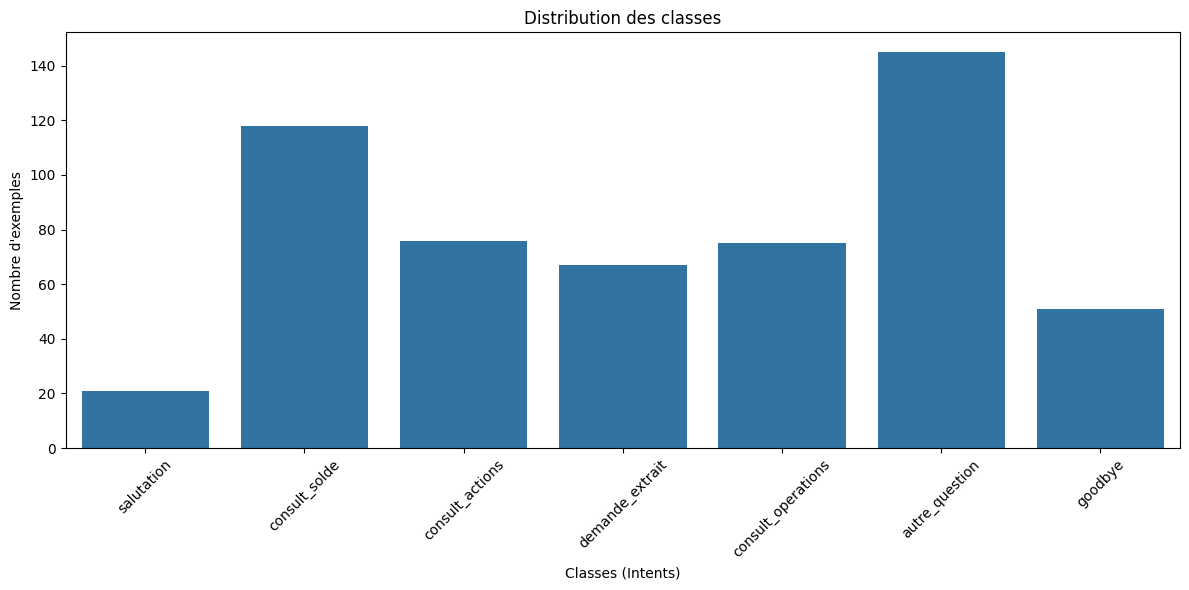

In [6]:
import json
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments, AutoConfig
from sklearn.preprocessing import LabelEncoder
import torch
from sklearn.model_selection import train_test_split

# Charger les données JSON
with open("intents_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
labels = [item["intent"] for item in data]

# Encoder les labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
# Affichage simple : étiquette → valeur
for etiq, val in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{etiq} → {val}")

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Compter les occurrences de chaque classe encodée
class_counts = Counter(encoded_labels)

# Afficher les classes et leur fréquence
print("\nDistribution des classes (nombre d'exemples par classe) :")
for label_id, count in class_counts.items():
    label_name = label_encoder.inverse_transform([label_id])[0]
    print(f"{label_name} ({label_id}) : {count} exemples")

# Affichage visuel avec Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=[label_encoder.inverse_transform([i])[0] for i in class_counts.keys()],
            y=list(class_counts.values()))
plt.title("Distribution des classes")
plt.xlabel("Classes (Intents)")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
# import json
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import numpy as np
# from datasets import Dataset
# from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments, AutoConfig
# from sklearn.preprocessing import LabelEncoder
# import torch
# from sklearn.model_selection import train_test_split
#
# # Charger les données JSON
# with open("intents_dataset.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#
# texts = [item["text"] for item in data]
# labels = [item["intent"] for item in data]
#
# # Encoder les labels
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)
#
# # Créer le dataset HuggingFace
# dataset = Dataset.from_dict({"text": texts, "label": encoded_labels})
#
# # Séparer en train/test
# dataset = dataset.train_test_split(test_size=0.2)
#
# # Tokeniser avec DistilBERT
# tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)
#
# tokenized_datasets = dataset.map(tokenize_function, batched=True)
#
# # Calcul des poids des classes
# labels_array = np.array(tokenized_datasets["train"]["label"])
# class_counts = np.bincount(labels_array)
# class_weights = 1.0 / class_counts
# class_weights = class_weights / class_weights.sum()  # normalisation facultative
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
#
# # Modèle personnalisé avec loss pondérée
# from torch.nn import CrossEntropyLoss
#
# class WeightedLossDistilBert(DistilBertForSequenceClassification):
#     def __init__(self, config, class_weights):
#         super().__init__(config)
#         self.class_weights = class_weights
#         self.loss_fct = CrossEntropyLoss(weight=self.class_weights)
#
#     def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
#         outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         loss = None
#         if labels is not None:
#             self.class_weights = self.class_weights.to(logits.device)  # Move weights to GPU if needed
#             loss = self.loss_fct(logits, labels)
#         return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}
#
# # Charger config et modèle personnalisé
# num_labels = len(label_encoder.classes_)
# config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
# model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)
#
# # Définir les arguments d'entraînement
# training_args = TrainingArguments(
#     output_dir="./results4",
#     eval_strategy="epoch",
#     learning_rate=3e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=10,
#     weight_decay=0.1,
#     logging_dir='./logs4',
#     logging_steps=10,
#     report_to=["tensorboard"],
#     load_best_model_at_end=True,
#     metric_for_best_model="f1",
#     greater_is_better=True,
#     save_strategy="epoch"
# )
#
# # Fonction de métriques personnalisée
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     cm = confusion_matrix(labels, predictions).tolist()
#     return {
#         "accuracy": accuracy_score(labels, predictions),
#         "f1": f1_score(labels, predictions, average="weighted"),
#         "confusion_matrix": cm
#     }
#
# # Créer le trainer avec modèle pondéré
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["test"],
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics
# )
#
# # Entraîner
# trainer.train()
#
# # Sauvegarde du modèle et du tokenizer
# model.save_pretrained("fine-tuned-distilbert-intents4")
# tokenizer.save_pretrained("fine-tuned-distilbert-intents4")
#
# # Sauvegarde des classes
# with open("label_encoder.json", "w", encoding="utf-8") as f:
#     json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)


Map:   0%|          | 0/442 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

C:\Users\LENOVO_PC\AppData\Local\Temp\ipykernel_2888\2984505097.py:94: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Confusion Matrix
1,1.674800,1.485558,0.252252,0.129177,"[[0, 0, 16, 0, 0, 6, 0], [0, 1, 17, 0, 0, 1, 0], [0, 0, 16, 0, 0, 0, 0], [0, 0, 26, 0, 0, 1, 0], [0, 0, 14, 0, 0, 0, 0], [0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 2, 0]]"
2,0.959000,0.790119,0.819820,0.826977,"[[16, 0, 0, 1, 3, 1, 1], [1, 17, 1, 0, 0, 0, 0], [0, 0, 12, 0, 4, 0, 0], [2, 0, 0, 21, 3, 1, 0], [0, 0, 1, 0, 13, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
3,0.587700,0.442098,0.837838,0.839207,"[[15, 2, 0, 1, 2, 0, 2], [0, 18, 1, 0, 0, 0, 0], [0, 0, 16, 0, 0, 0, 0], [0, 1, 0, 24, 2, 0, 0], [0, 1, 5, 0, 8, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
4,0.185300,0.390379,0.873874,0.877120,"[[21, 0, 0, 0, 1, 0, 0], [1, 17, 1, 0, 0, 0, 0], [0, 0, 15, 0, 1, 0, 0], [0, 0, 0, 24, 3, 0, 0], [0, 0, 6, 0, 8, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
5,0.097300,0.410656,0.900901,0.901533,"[[21, 0, 0, 0, 1, 0, 0], [1, 17, 1, 0, 0, 0, 0], [0, 0, 15, 0, 1, 0, 0], [0, 0, 0, 26, 1, 0, 0], [1, 0, 4, 0, 9, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
6,0.061200,0.386189,0.900901,0.902971,"[[21, 0, 0, 0, 1, 0, 0], [1, 17, 1, 0, 0, 0, 0], [0, 0, 15, 0, 1, 0, 0], [0, 0, 0, 25, 2, 0, 0], [1, 0, 3, 0, 10, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
7,0.103800,0.379458,0.909910,0.911074,"[[21, 0, 0, 0, 1, 0, 0], [1, 17, 1, 0, 0, 0, 0], [0, 0, 15, 0, 1, 0, 0], [0, 0, 0, 26, 1, 0, 0], [1, 0, 3, 0, 10, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
8,0.012100,0.431967,0.909910,0.910116,"[[22, 0, 0, 0, 0, 0, 0], [1, 17, 1, 0, 0, 0, 0], [1, 0, 14, 0, 1, 0, 0], [0, 0, 0, 26, 1, 0, 0], [2, 0, 2, 0, 10, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
9,0.007600,0.398954,0.909910,0.911074,"[[21, 0, 0, 0, 1, 0, 0], [1, 17, 1, 0, 0, 0, 0], [0, 0, 15, 0, 1, 0, 0], [0, 0, 0, 26, 1, 0, 0], [1, 0, 3, 0, 10, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"
10,0.041300,0.386316,0.909910,0.911074,"[[21, 0, 0, 0, 1, 0, 0], [1, 17, 1, 0, 0, 0, 0], [0, 0, 15, 0, 1, 0, 0], [0, 0, 0, 26, 1, 0, 0], [1, 0, 3, 0, 10, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]"


Trainer is attempting to log a value of "[[0, 0, 16, 0, 0, 6, 0], [0, 1, 17, 0, 0, 1, 0], [0, 0, 16, 0, 0, 0, 0], [0, 0, 26, 0, 0, 1, 0], [0, 0, 14, 0, 0, 0, 0], [0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 2, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[16, 0, 0, 1, 3, 1, 1], [1, 17, 1, 0, 0, 0, 0], [0, 0, 12, 0, 4, 0, 0], [2, 0, 0, 21, 3, 1, 0], [0, 0, 1, 0, 13, 0, 0], [0, 0, 0, 0, 0, 10, 1], [0, 0, 0, 0, 0, 0, 2]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO

In [3]:
# import json
# import numpy as np
# import random
# import torch
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from transformers import (
#     DistilBertTokenizerFast,
#     DistilBertForSequenceClassification,
#     AutoConfig,
#     Trainer,
#     TrainingArguments,
#     EarlyStoppingCallback
# )
# from datasets import Dataset
#
# # Reproductibilité
# def set_seed(seed=42):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#
# set_seed(42)
#
# # Chargement des données
# with open("intents_dataset.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#
# texts = [item["text"] for item in data]
# labels = [item["intent"] for item in data]
#
# # Encodage des labels
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)
#
# # Séparation train / val / test
# X_temp, X_test, y_temp, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)
#
# # Création des datasets HuggingFace
# dataset_dict = {
#     "train": Dataset.from_dict({"text": X_train, "label": y_train}),
#     "validation": Dataset.from_dict({"text": X_val, "label": y_val}),
#     "test": Dataset.from_dict({"text": X_test, "label": y_test})
# }
#
# # Tokenisation
# tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
#
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)
#
# tokenized_datasets = {split: ds.map(tokenize_function, batched=True) for split, ds in dataset_dict.items()}
#
# # Calcul des poids des classes (sur le train uniquement)
# labels_array = np.array(tokenized_datasets["train"]["label"])
# class_counts = np.bincount(labels_array)
# class_weights = 1.0 / class_counts
# class_weights = class_weights / class_weights.sum()
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
#
# # Modèle personnalisé avec perte pondérée
# from torch.nn import CrossEntropyLoss
#
# class WeightedLossDistilBert(DistilBertForSequenceClassification):
#     def __init__(self, config, class_weights):
#         super().__init__(config)
#         self.class_weights = class_weights
#         self.loss_fct = CrossEntropyLoss(weight=self.class_weights)
#
#     def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
#         outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         loss = None
#         if labels is not None:
#             self.class_weights = self.class_weights.to(logits.device)
#             loss = self.loss_fct(logits, labels)
#         return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}
#
# # Configuration
# num_labels = len(label_encoder.classes_)
# config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
# model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)
#
# # Fonction de métriques
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return {
#         "accuracy": accuracy_score(labels, predictions),
#         "f1": f1_score(labels, predictions, average="weighted"),
#         "confusion_matrix": confusion_matrix(labels, predictions).tolist()
#     }
#
# # Paramètres d'entraînement
# training_args = TrainingArguments(
#     output_dir="./results",
#     eval_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=3e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=7,
#     weight_decay=0.1,
#     logging_dir='./logs',
#     logging_steps=10,
#     report_to=["tensorboard"],
#     load_best_model_at_end=True,
#     metric_for_best_model="f1",
#     greater_is_better=True
# )
#
# # Trainer avec validation séparée
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["validation"],  # validation correcte ici
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
# )
#
# # Entraînement
# trainer.train()
#
# # Sauvegarde
# model.save_pretrained("fine-tuned-distilbert-intents")
# tokenizer.save_pretrained("fine-tuned-distilbert-intents")
# with open("label_encoder.json", "w", encoding="utf-8") as f:
#     json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)
#
# # Évaluation finale sur le test avec métriques
# test_results = trainer.evaluate(tokenized_datasets["test"])
#
# # Affichage des résultats de l'évaluation finale
# accuracy = test_results['eval_accuracy']
# f1 = test_results['eval_f1']
# confusion_matrix_result = test_results['eval_confusion_matrix']
#
# print("\n Final test results:")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)


Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

C:\Users\LENOVO_PC\AppData\Local\Temp\ipykernel_14068\1617640538.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Confusion Matrix
1,1.710100,1.553988,0.422222,0.421339,"[[2, 0, 0, 3, 0, 7, 0], [2, 2, 0, 2, 0, 0, 0], [2, 0, 3, 1, 0, 0, 0], [1, 0, 0, 6, 0, 3, 0], [2, 0, 0, 1, 2, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 2, 0]]"
2,1.068600,1.135406,0.600000,0.568095,"[[9, 0, 0, 1, 0, 2, 0], [2, 3, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [3, 0, 2, 5, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 0, 1]]"
3,0.744800,0.738443,0.688889,0.686644,"[[8, 0, 0, 0, 2, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [3, 0, 0, 6, 1, 0, 0], [1, 0, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 3, 1], [0, 0, 0, 0, 0, 0, 2]]"
4,0.434100,0.471211,0.800000,0.809006,"[[9, 0, 0, 0, 0, 0, 3], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 3, 1], [0, 0, 0, 0, 0, 0, 2]]"
5,0.168900,0.335285,0.866667,0.870501,"[[10, 0, 0, 0, 0, 0, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 9, 1, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
6,0.086400,0.308764,0.888889,0.890371,"[[10, 0, 0, 0, 0, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
7,0.135100,0.286864,0.888889,0.890371,"[[10, 0, 0, 0, 0, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"


Trainer is attempting to log a value of "[[2, 0, 0, 3, 0, 7, 0], [2, 2, 0, 2, 0, 0, 0], [2, 0, 3, 1, 0, 0, 0], [1, 0, 0, 6, 0, 3, 0], [2, 0, 0, 1, 2, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 2, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[9, 0, 0, 1, 0, 2, 0], [2, 3, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [3, 0, 2, 5, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 0, 1]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCent

Trainer is attempting to log a value of "[[26, 0, 1, 0, 2, 0, 0], [1, 13, 0, 0, 1, 0, 0], [1, 0, 12, 0, 2, 0, 0], [1, 0, 0, 20, 3, 0, 0], [2, 0, 1, 0, 11, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.



 Final test results:
Accuracy: 0.8649
F1 Score: 0.8705

Confusion Matrix:
[[26, 0, 1, 0, 2, 0, 0], [1, 13, 0, 0, 1, 0, 0], [1, 0, 12, 0, 2, 0, 0], [1, 0, 0, 20, 3, 0, 0], [2, 0, 1, 0, 11, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]


In [1]:
# import json
# import numpy as np
# import random
# import torch
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from transformers import (
#     DistilBertTokenizerFast,
#     DistilBertForSequenceClassification,
#     AutoConfig,
#     Trainer,
#     TrainingArguments,
#     EarlyStoppingCallback
# )
# from datasets import Dataset
#
# # Reproductibilité
# def set_seed(seed=42):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#
# set_seed(42)
#
# # Chargement des données
# with open("intents_dataset.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#
# texts = [item["text"] for item in data]
# labels = [item["intent"] for item in data]
#
# # Encodage des labels
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)
#
# # Séparation train / val / test
# X_temp, X_test, y_temp, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)
#
# # Création des datasets HuggingFace
# dataset_dict = {
#     "train": Dataset.from_dict({"text": X_train, "label": y_train}),
#     "validation": Dataset.from_dict({"text": X_val, "label": y_val}),
#     "test": Dataset.from_dict({"text": X_test, "label": y_test})
# }
#
# # Tokenisation
# tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
#
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)
#
# tokenized_datasets = {split: ds.map(tokenize_function, batched=True) for split, ds in dataset_dict.items()}
#
# # Calcul des poids des classes (sur le train uniquement)
# labels_array = np.array(tokenized_datasets["train"]["label"])
# class_counts = np.bincount(labels_array)
# class_weights = 1.0 / class_counts
# class_weights = class_weights / class_weights.sum()
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
#
# # Modèle personnalisé avec perte pondérée
# from torch.nn import CrossEntropyLoss
#
# class WeightedLossDistilBert(DistilBertForSequenceClassification):
#     def __init__(self, config, class_weights):
#         super().__init__(config)
#         self.class_weights = class_weights
#         self.loss_fct = CrossEntropyLoss(weight=self.class_weights)
#
#     def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
#         outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         loss = None
#         if labels is not None:
#             self.class_weights = self.class_weights.to(logits.device)
#             loss = self.loss_fct(logits, labels)
#         return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}
#
# # Configuration
# num_labels = len(label_encoder.classes_)
# config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
# model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)
#
# # Fonction de métriques
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return {
#         "accuracy": accuracy_score(labels, predictions),
#         "f1": f1_score(labels, predictions, average="weighted"),
#         "confusion_matrix": confusion_matrix(labels, predictions).tolist()
#     }
#
# # Paramètres d'entraînement
# training_args = TrainingArguments(
#     output_dir="./results5",
#     eval_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=3e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=10,
#     weight_decay=0.1,
#     logging_dir='./logs5',
#     logging_steps=10,
#     report_to=["tensorboard"],
#     load_best_model_at_end=True,
#     metric_for_best_model="f1",
#     greater_is_better=True
# )
#
# # Trainer avec validation séparée
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["validation"],  # validation correcte ici
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
# )
#
# # Entraînement
# trainer.train()
#
# # Sauvegarde
# model.save_pretrained("fine-tuned-distilbert-intents5")
# tokenizer.save_pretrained("fine-tuned-distilbert-intents5")
# with open("label_encoder.json", "w", encoding="utf-8") as f:
#     json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)
#
# # Évaluation finale sur le test avec métriques
# test_results = trainer.evaluate(tokenized_datasets["test"])
#
# # Affichage des résultats de l'évaluation finale
# accuracy = test_results['eval_accuracy']
# f1 = test_results['eval_f1']
# confusion_matrix_result = test_results['eval_confusion_matrix']
#
# print("\n Final test results:")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)


In [1]:
# import json
# import numpy as np
# import random
# import torch
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from transformers import (
#     DistilBertTokenizerFast,
#     DistilBertForSequenceClassification,
#     AutoConfig,
#     Trainer,
#     TrainingArguments,
#     EarlyStoppingCallback
# )
# from datasets import Dataset
#
# # Reproductibilité
# def set_seed(seed=42):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#
# set_seed(42)
#
# # Chargement des données
# with open("intents_dataset.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#
# texts = [item["text"] for item in data]
# labels = [item["intent"] for item in data]
#
# # Encodage des labels
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)
#
# # Séparation train / val / test
# X_temp, X_test, y_temp, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)
#
# # Création des datasets HuggingFace
# dataset_dict = {
#     "train": Dataset.from_dict({"text": X_train, "label": y_train}),
#     "validation": Dataset.from_dict({"text": X_val, "label": y_val}),
#     "test": Dataset.from_dict({"text": X_test, "label": y_test})
# }
#
# # Tokenisation
# tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
#
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)
#
# tokenized_datasets = {split: ds.map(tokenize_function, batched=True) for split, ds in dataset_dict.items()}
#
# # Calcul des poids des classes (sur le train uniquement)
# labels_array = np.array(tokenized_datasets["train"]["label"])
# class_counts = np.bincount(labels_array)
# class_weights = 1.0 / class_counts
# class_weights = class_weights / class_weights.sum()
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
#
# # Modèle personnalisé avec perte pondérée
# from torch.nn import CrossEntropyLoss
#
# class WeightedLossDistilBert(DistilBertForSequenceClassification):
#     def __init__(self, config, class_weights):
#         super().__init__(config)
#         self.class_weights = class_weights
#         self.loss_fct = CrossEntropyLoss(weight=self.class_weights)
#
#     def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
#         outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         loss = None
#         if labels is not None:
#             self.class_weights = self.class_weights.to(logits.device)
#             loss = self.loss_fct(logits, labels)
#         return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}
#
# # Configuration
# num_labels = len(label_encoder.classes_)
# config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
# model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)
#
# # Fonction de métriques
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return {
#         "accuracy": accuracy_score(labels, predictions),
#         "f1": f1_score(labels, predictions, average="weighted"),
#         "confusion_matrix": confusion_matrix(labels, predictions).tolist()
#     }
#
# # Paramètres d'entraînement
# training_args = TrainingArguments(
#     output_dir="./results6",
#     eval_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=3e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=15,
#     weight_decay=0.1,
#     logging_dir='./logs6',
#     logging_steps=10,
#     report_to=["tensorboard"],
#     load_best_model_at_end=True,
#     metric_for_best_model="f1",
#     greater_is_better=True
# )
#
# # Trainer avec validation séparée
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["validation"],  # validation correcte ici
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=4)]
# )
#
# # Entraînement
# trainer.train()
#
# # Sauvegarde
# model.save_pretrained("fine-tuned-distilbert-intents6")
# tokenizer.save_pretrained("fine-tuned-distilbert-intents6")
# with open("label_encoder.json", "w", encoding="utf-8") as f:
#     json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)
#
# # Évaluation finale sur le test avec métriques
# test_results = trainer.evaluate(tokenized_datasets["test"])
#
# # Affichage des résultats de l'évaluation finale
# accuracy = test_results['eval_accuracy']
# f1 = test_results['eval_f1']
# confusion_matrix_result = test_results['eval_confusion_matrix']
#
# print("\n Final test results:")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)


ERROR! Session/line number was not unique in database. History logging moved to new session 148


Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

C:\Users\LENOVO_PC\AppData\Local\Temp\ipykernel_7704\1817272123.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Confusion Matrix
1,1.699400,1.553002,0.355556,0.339259,"[[3, 0, 0, 2, 0, 7, 0], [3, 2, 0, 1, 0, 0, 0], [3, 0, 2, 1, 0, 0, 0], [2, 0, 0, 5, 0, 3, 0], [4, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 2, 0]]"
2,0.997200,1.032009,0.688889,0.656445,"[[9, 0, 0, 1, 0, 2, 0], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [2, 0, 1, 7, 0, 0, 0], [1, 0, 4, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 0, 1]]"
3,0.729700,0.780224,0.644444,0.637879,"[[7, 0, 2, 0, 1, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [4, 0, 0, 5, 1, 0, 0], [1, 0, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 3, 1], [0, 0, 0, 0, 0, 0, 2]]"
4,0.354400,0.524481,0.800000,0.792146,"[[10, 0, 0, 0, 0, 0, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 1, 0, 9, 0, 0, 0], [1, 0, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 3, 1], [0, 0, 0, 0, 0, 0, 2]]"
5,0.120100,0.336757,0.866667,0.870098,"[[10, 0, 0, 0, 0, 0, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
6,0.137700,0.291368,0.888889,0.890156,"[[10, 0, 0, 0, 0, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 9, 1, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
7,0.066800,0.268165,0.888889,0.894107,"[[10, 0, 0, 0, 0, 0, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 9, 1, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
8,0.064100,0.268256,0.888889,0.888469,"[[11, 0, 0, 0, 0, 0, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
9,0.012200,0.225655,0.933333,0.934082,"[[11, 0, 0, 0, 0, 1, 0], [0, 6, 0, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
10,0.008500,0.236871,0.888889,0.888987,"[[11, 0, 0, 0, 0, 0, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 9, 1, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"


Trainer is attempting to log a value of "[[3, 0, 0, 2, 0, 7, 0], [3, 2, 0, 1, 0, 0, 0], [3, 0, 2, 1, 0, 0, 0], [2, 0, 0, 5, 0, 3, 0], [4, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 2, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[9, 0, 0, 1, 0, 2, 0], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [2, 0, 1, 7, 0, 0, 0], [1, 0, 4, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 0, 1]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCent

Trainer is attempting to log a value of "[[27, 0, 1, 0, 1, 0, 0], [1, 14, 0, 0, 0, 0, 0], [0, 0, 13, 0, 2, 0, 0], [1, 0, 0, 20, 3, 0, 0], [0, 0, 0, 0, 14, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.



 Final test results:
Accuracy: 0.9189
F1 Score: 0.9214

Confusion Matrix:
[[27, 0, 1, 0, 1, 0, 0], [1, 14, 0, 0, 0, 0, 0], [0, 0, 13, 0, 2, 0, 0], [1, 0, 0, 20, 3, 0, 0], [0, 0, 0, 0, 14, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]


In [2]:
# import json
# import numpy as np
# import random
# import torch
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from transformers import (
#     DistilBertTokenizerFast,
#     DistilBertForSequenceClassification,
#     AutoConfig,
#     Trainer,
#     TrainingArguments,
#     EarlyStoppingCallback
# )
# from datasets import Dataset
#
# # Reproductibilité
# def set_seed(seed=42):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#
# set_seed(42)
#
# # Chargement des données
# with open("intents_dataset.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
#
# texts = [item["text"] for item in data]
# labels = [item["intent"] for item in data]
#
# # Encodage des labels
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)
#
# # Séparation train / val / test
# X_temp, X_test, y_temp, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)
#
# # Création des datasets HuggingFace
# dataset_dict = {
#     "train": Dataset.from_dict({"text": X_train, "label": y_train}),
#     "validation": Dataset.from_dict({"text": X_val, "label": y_val}),
#     "test": Dataset.from_dict({"text": X_test, "label": y_test})
# }
#
# # Tokenisation
# tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
#
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)
#
# tokenized_datasets = {split: ds.map(tokenize_function, batched=True) for split, ds in dataset_dict.items()}
#
# # Calcul des poids des classes (sur le train uniquement)
# labels_array = np.array(tokenized_datasets["train"]["label"])
# class_counts = np.bincount(labels_array)
# class_weights = 1.0 / class_counts
# class_weights = class_weights / class_weights.sum()
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
#
# # Modèle personnalisé avec perte pondérée
# from torch.nn import CrossEntropyLoss
#
# class WeightedLossDistilBert(DistilBertForSequenceClassification):
#     def __init__(self, config, class_weights):
#         super().__init__(config)
#         self.class_weights = class_weights
#         self.loss_fct = CrossEntropyLoss(weight=self.class_weights)
#
#     def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
#         outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         loss = None
#         if labels is not None:
#             self.class_weights = self.class_weights.to(logits.device)
#             loss = self.loss_fct(logits, labels)
#         return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}
#
# # Configuration
# num_labels = len(label_encoder.classes_)
# config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
# model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)
#
# # Fonction de métriques
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return {
#         "accuracy": accuracy_score(labels, predictions),
#         "f1": f1_score(labels, predictions, average="weighted"),
#         "confusion_matrix": confusion_matrix(labels, predictions).tolist()
#     }
#
# # Paramètres d'entraînement
# training_args = TrainingArguments(
#     output_dir="./results7",
#     eval_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=7,
#     weight_decay=0.1,
#     logging_dir='./logs7',
#     logging_steps=10,
#     report_to=["tensorboard"],
#     load_best_model_at_end=True,
#     metric_for_best_model="f1",
#     greater_is_better=True
# )
#
# # Trainer avec validation séparée
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["validation"],  # validation correcte ici
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=4)]
# )
#
# # Entraînement
# trainer.train()
#
# # Sauvegarde
# model.save_pretrained("fine-tuned-distilbert-intents7")
# tokenizer.save_pretrained("fine-tuned-distilbert-intents7")
# with open("label_encoder.json", "w", encoding="utf-8") as f:
#     json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)
#
# # Évaluation finale sur le test avec métriques
# test_results = trainer.evaluate(tokenized_datasets["test"])
#
# # Affichage des résultats de l'évaluation finale
# accuracy = test_results['eval_accuracy']
# f1 = test_results['eval_f1']
# confusion_matrix_result = test_results['eval_confusion_matrix']
#
# print("\n Final test results:")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix_result)


Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

C:\Users\LENOVO_PC\AppData\Local\Temp\ipykernel_7704\2226611445.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Confusion Matrix
1,1.842200,1.617226,0.377778,0.264306,"[[1, 0, 1, 6, 0, 4, 0], [0, 0, 3, 3, 0, 0, 0], [0, 0, 5, 1, 0, 0, 0], [0, 0, 1, 8, 0, 1, 0], [0, 0, 4, 1, 0, 0, 0], [0, 0, 0, 1, 0, 3, 0], [0, 0, 0, 0, 0, 2, 0]]"
2,1.346800,1.385899,0.533333,0.469206,"[[9, 0, 0, 1, 0, 2, 0], [4, 1, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [4, 0, 1, 5, 0, 0, 0], [1, 0, 4, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 1, 0]]"
3,0.954700,0.941373,0.711111,0.717809,"[[8, 0, 0, 1, 1, 0, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 5, 4, 0, 0], [0, 0, 2, 0, 3, 0, 0], [1, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 2]]"
4,0.646300,0.679002,0.733333,0.725319,"[[9, 0, 0, 0, 0, 1, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [3, 0, 0, 7, 0, 0, 0], [1, 0, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 3, 1], [0, 0, 0, 0, 0, 0, 2]]"
5,0.358600,0.505162,0.800000,0.806538,"[[7, 0, 0, 0, 2, 1, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 8, 2, 0, 0], [0, 0, 1, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
6,0.280100,0.390287,0.866667,0.866148,"[[10, 0, 0, 0, 0, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
7,0.301500,0.347064,0.888889,0.890371,"[[10, 0, 0, 0, 0, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"


Trainer is attempting to log a value of "[[1, 0, 1, 6, 0, 4, 0], [0, 0, 3, 3, 0, 0, 0], [0, 0, 5, 1, 0, 0, 0], [0, 0, 1, 8, 0, 1, 0], [0, 0, 4, 1, 0, 0, 0], [0, 0, 0, 1, 0, 3, 0], [0, 0, 0, 0, 0, 2, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[9, 0, 0, 1, 0, 2, 0], [4, 1, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [4, 0, 1, 5, 0, 0, 0], [1, 0, 4, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 1, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCent

Trainer is attempting to log a value of "[[26, 0, 1, 0, 2, 0, 0], [1, 13, 0, 0, 1, 0, 0], [1, 0, 12, 0, 2, 0, 0], [0, 0, 0, 20, 4, 0, 0], [1, 0, 1, 0, 12, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.



 Final test results:
Accuracy: 0.8739
F1 Score: 0.8807

Confusion Matrix:
[[26, 0, 1, 0, 2, 0, 0], [1, 13, 0, 0, 1, 0, 0], [1, 0, 12, 0, 2, 0, 0], [0, 0, 0, 20, 4, 0, 0], [1, 0, 1, 0, 12, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]


In [ ]:
import json
import numpy as np
import random
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    AutoConfig,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)
from datasets import Dataset

# Reproductibilité
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Chargement des données
with open("intents_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
labels = [item["intent"] for item in data]

# Encodage des labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Séparation train / val / test
X_temp, X_test, y_temp, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

# Création des datasets HuggingFace
dataset_dict = {
    "train": Dataset.from_dict({"text": X_train, "label": y_train}),
    "validation": Dataset.from_dict({"text": X_val, "label": y_val}),
    "test": Dataset.from_dict({"text": X_test, "label": y_test})
}

# Tokenisation
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = {split: ds.map(tokenize_function, batched=True) for split, ds in dataset_dict.items()}

# Calcul des poids des classes (sur le train uniquement)
labels_array = np.array(tokenized_datasets["train"]["label"])
class_counts = np.bincount(labels_array)
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum()
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Modèle personnalisé avec perte pondérée
from torch.nn import CrossEntropyLoss

class WeightedLossDistilBert(DistilBertForSequenceClassification):
    def __init__(self, config, class_weights):
        super().__init__(config)
        self.class_weights = class_weights
        self.loss_fct = CrossEntropyLoss(weight=self.class_weights)

    def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
        outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = None
        if labels is not None:
            self.class_weights = self.class_weights.to(logits.device)
            loss = self.loss_fct(logits, labels)
        return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}

# Configuration
num_labels = len(label_encoder.classes_)
config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)

# Fonction de métriques
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),
        "confusion_matrix": confusion_matrix(labels, predictions).tolist()
    }

# Paramètres d'entraînement
training_args = TrainingArguments(
    output_dir="./results8",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,
    weight_decay=0.1,
    logging_dir='./logs8',
    logging_steps=10,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Trainer avec validation séparée
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],  # validation correcte ici
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=4)]
)

# Entraînement
trainer.train()

# Sauvegarde
model.save_pretrained("fine-tuned-distilbert-intents8")
tokenizer.save_pretrained("fine-tuned-distilbert-intents8")
with open("label_encoder.json", "w", encoding="utf-8") as f:
    json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)

# Évaluation finale sur le test avec métriques
test_results = trainer.evaluate(tokenized_datasets["test"])

# Affichage des résultats de l'évaluation finale
accuracy = test_results['eval_accuracy']
f1 = test_results['eval_f1']
confusion_matrix_result = test_results['eval_confusion_matrix']

print("\n Final test results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix_result)



KeyboardInterrupt


KeyboardInterrupt



In [1]:
import json
import numpy as np
import random
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    AutoConfig,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)
from datasets import Dataset

# Reproductibilité
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Chargement des données
with open("intents_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
labels = [item["intent"] for item in data]

# Encodage des labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Séparation train / val / test
X_temp, X_test, y_temp, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

# Création des datasets HuggingFace
dataset_dict = {
    "train": Dataset.from_dict({"text": X_train, "label": y_train}),
    "validation": Dataset.from_dict({"text": X_val, "label": y_val}),
    "test": Dataset.from_dict({"text": X_test, "label": y_test})
}

# Tokenisation
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = {split: ds.map(tokenize_function, batched=True) for split, ds in dataset_dict.items()}

# Calcul des poids des classes (sur le train uniquement)
labels_array = np.array(tokenized_datasets["train"]["label"])
class_counts = np.bincount(labels_array)
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum()
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Modèle personnalisé avec perte pondérée
from torch.nn import CrossEntropyLoss

class WeightedLossDistilBert(DistilBertForSequenceClassification):
    def __init__(self, config, class_weights):
        super().__init__(config)
        self.class_weights = class_weights
        self.loss_fct = CrossEntropyLoss(weight=self.class_weights)

    def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
        outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = None
        if labels is not None:
            self.class_weights = self.class_weights.to(logits.device)
            loss = self.loss_fct(logits, labels)
        return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}

# Configuration
num_labels = len(label_encoder.classes_)
config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)

# Fonction de métriques
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),
        "confusion_matrix": confusion_matrix(labels, predictions).tolist()
    }

# Paramètres d'entraînement
training_args = TrainingArguments(
    output_dir="./results9",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=20,
    weight_decay=0.1,
    logging_dir='./logs9',
    logging_steps=10,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Trainer avec validation séparée
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],  # validation correcte ici
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=7)]
)

# Entraînement
trainer.train()

# Sauvegarde
model.save_pretrained("fine-tuned-distilbert-intents9")
tokenizer.save_pretrained("fine-tuned-distilbert-intents9")
with open("label_encoder.json", "w", encoding="utf-8") as f:
    json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)

# Évaluation finale sur le test avec métriques
test_results = trainer.evaluate(tokenized_datasets["test"])

# Affichage des résultats de l'évaluation finale
accuracy = test_results['eval_accuracy']
f1 = test_results['eval_f1']
confusion_matrix_result = test_results['eval_confusion_matrix']

print("\n Final test results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix_result)


Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

C:\Users\LENOVO_PC\AppData\Local\Temp\ipykernel_1636\802318322.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Confusion Matrix
1,1.689900,1.551117,0.355556,0.336247,"[[3, 0, 0, 2, 0, 7, 0], [2, 2, 0, 2, 0, 0, 0], [3, 0, 2, 1, 0, 0, 0], [2, 0, 0, 5, 0, 3, 0], [4, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 2, 0]]"
2,0.996100,1.024624,0.666667,0.620889,"[[9, 0, 0, 1, 0, 2, 0], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [2, 0, 1, 7, 0, 0, 0], [1, 0, 4, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 1, 0]]"
3,0.714400,0.823266,0.644444,0.640635,"[[8, 0, 2, 0, 0, 1, 1], [1, 4, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [3, 0, 1, 5, 1, 0, 0], [0, 0, 4, 0, 1, 0, 0], [0, 0, 0, 0, 0, 3, 1], [0, 0, 0, 0, 0, 0, 2]]"
4,0.349600,0.538569,0.800000,0.792585,"[[10, 0, 0, 0, 0, 0, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 3, 1], [0, 0, 0, 0, 0, 0, 2]]"
5,0.117400,0.323682,0.888889,0.888469,"[[11, 0, 0, 0, 0, 0, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
6,0.122200,0.331391,0.866667,0.868373,"[[9, 0, 0, 0, 1, 1, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 9, 1, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
7,0.052700,0.260668,0.888889,0.891456,"[[10, 0, 0, 0, 0, 0, 2], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 10, 0, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
8,0.062300,0.292024,0.888889,0.888469,"[[11, 0, 0, 0, 0, 0, 1], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
9,0.008300,0.240802,0.933333,0.934208,"[[12, 0, 0, 0, 0, 0, 0], [1, 5, 0, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [1, 0, 0, 9, 0, 0, 0], [1, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"
10,0.007500,0.222426,0.888889,0.887999,"[[11, 0, 0, 0, 0, 1, 0], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 9, 1, 0, 0], [1, 0, 1, 0, 3, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 2]]"


Trainer is attempting to log a value of "[[3, 0, 0, 2, 0, 7, 0], [2, 2, 0, 2, 0, 0, 0], [3, 0, 2, 1, 0, 0, 0], [2, 0, 0, 5, 0, 3, 0], [4, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 2, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[9, 0, 0, 1, 0, 2, 0], [0, 5, 1, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0], [2, 0, 1, 7, 0, 0, 0], [1, 0, 4, 0, 0, 0, 0], [1, 0, 0, 0, 0, 3, 0], [1, 0, 0, 0, 0, 1, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCent

Trainer is attempting to log a value of "[[26, 0, 1, 0, 2, 0, 0], [1, 14, 0, 0, 0, 0, 0], [0, 0, 14, 0, 1, 0, 0], [0, 0, 0, 20, 3, 0, 1], [0, 0, 0, 0, 14, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.



 Final test results:
Accuracy: 0.9189
F1 Score: 0.9218

Confusion Matrix:
[[26, 0, 1, 0, 2, 0, 0], [1, 14, 0, 0, 0, 0, 0], [0, 0, 14, 0, 1, 0, 0], [0, 0, 0, 20, 3, 0, 1], [0, 0, 0, 0, 14, 0, 0], [0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 4]]


In [1]:
import json
import numpy as np
import random
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    AutoConfig,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)
from datasets import Dataset
from torch.nn import CrossEntropyLoss
from textattack.augmentation import EasyDataAugmenter  # Nouveau module

# Reproductibilité
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Chargement des données
with open("intents_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
labels = [item["intent"] for item in data]

# Encodage des labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

#  DATA AUGMENTATION sur l'entraînement uniquement
augmenter = EasyDataAugmenter(pct_words_to_swap=0.1, transformations_per_example=1)

aug_texts = []
aug_labels = []
for text, label in zip(texts, encoded_labels):
    # Augment uniquement si classe sous-représentée (facultatif : ici on fait pour tous)
    augmented = augmenter.augment(text)
    aug_texts.extend(augmented)
    aug_labels.extend([label] * len(augmented))

# Ajout des données augmentées aux données originales
texts_extended = texts + aug_texts
labels_extended = list(encoded_labels) + aug_labels

# Split train/val/test après augmentation
X_temp, X_test, y_temp, y_test = train_test_split(
    texts_extended, labels_extended, test_size=0.2, random_state=42, stratify=labels_extended)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

# HuggingFace Dataset
dataset_dict = {
    "train": Dataset.from_dict({"text": X_train, "label": y_train}),
    "validation": Dataset.from_dict({"text": X_val, "label": y_val}),
    "test": Dataset.from_dict({"text": X_test, "label": y_test})
}

# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = {
    split: ds.map(tokenize_function, batched=True)
    for split, ds in dataset_dict.items()
}

# Poids des classes
labels_array = np.array(tokenized_datasets["train"]["label"])
class_counts = np.bincount(labels_array)
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum()
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Modèle avec perte pondérée
class WeightedLossDistilBert(DistilBertForSequenceClassification):
    def __init__(self, config, class_weights):
        super().__init__(config)
        self.class_weights = class_weights
        self.loss_fct = CrossEntropyLoss(weight=self.class_weights)

    def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
        outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = None
        if labels is not None:
            self.class_weights = self.class_weights.to(logits.device)
            loss = self.loss_fct(logits, labels)
        return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}

# Config et modèle
num_labels = len(label_encoder.classes_)
config = AutoConfig.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
model = WeightedLossDistilBert(config=config, class_weights=class_weights_tensor)

# Métriques
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),
        "confusion_matrix": confusion_matrix(labels, predictions).tolist()
    }

# Training args
training_args = TrainingArguments(
    output_dir="./results_augmented",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,
    weight_decay=0.1,
    logging_dir='./logs_augmented',
    logging_steps=10,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=8)]
)

# Entraînement
trainer.train()

# Sauvegarde
model.save_pretrained("fine-tuned-distilbert-intents-augmented")
tokenizer.save_pretrained("fine-tuned-distilbert-intents-augmented")
with open("label_encoder.json", "w", encoding="utf-8") as f:
    json.dump(label_encoder.classes_.tolist(), f, ensure_ascii=False)

# Évaluation finale
test_results = trainer.evaluate(tokenized_datasets["test"])
accuracy = test_results['eval_accuracy']
f1 = test_results['eval_f1']
confusion_matrix_result = test_results['eval_confusion_matrix']

print("\n Final test results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix_result)


ERROR! Session/line number was not unique in database. History logging moved to new session 169


C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\jieba\__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\jieba\__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\jieba\finalseg\__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Map:   0%|          | 0/795 [00:00<?, ? examples/s]

Map:   0%|          | 0/89 [00:00<?, ? examples/s]

Map:   0%|          | 0/222 [00:00<?, ? examples/s]

C:\Users\LENOVO_PC\AppData\Local\Temp\ipykernel_11236\4177200486.py:136: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Confusion Matrix
1,1.035800,0.903630,0.674157,0.644856,"[[11, 0, 1, 4, 1, 1, 5], [1, 11, 0, 0, 0, 0, 0], [2, 0, 10, 0, 0, 0, 0], [2, 0, 0, 15, 0, 2, 0], [4, 0, 1, 5, 1, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
2,0.366600,0.346980,0.842697,0.839353,"[[14, 3, 2, 0, 3, 0, 1], [0, 11, 1, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 17, 1, 0, 0], [1, 0, 1, 0, 9, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
3,0.074700,0.114638,0.977528,0.977577,"[[23, 0, 0, 0, 0, 0, 0], [0, 12, 0, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [1, 0, 0, 0, 10, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
4,0.102200,0.086754,0.988764,0.988732,"[[23, 0, 0, 0, 0, 0, 0], [0, 12, 0, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
5,0.008400,0.084238,0.988764,0.988732,"[[23, 0, 0, 0, 0, 0, 0], [0, 12, 0, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
6,0.098100,0.096874,0.977528,0.977621,"[[22, 0, 0, 0, 1, 0, 0], [0, 12, 0, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
7,0.023100,0.059629,0.988764,0.988732,"[[23, 0, 0, 0, 0, 0, 0], [0, 12, 0, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
8,0.082000,0.074504,0.988764,0.988732,"[[23, 0, 0, 0, 0, 0, 0], [0, 12, 0, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
9,0.001000,0.073656,0.988764,0.988732,"[[23, 0, 0, 0, 0, 0, 0], [0, 12, 0, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"
10,0.001700,0.099615,0.966292,0.966832,"[[22, 0, 0, 0, 1, 0, 0], [0, 11, 0, 0, 1, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]"


Trainer is attempting to log a value of "[[11, 0, 1, 4, 1, 1, 5], [1, 11, 0, 0, 0, 0, 0], [2, 0, 10, 0, 0, 0, 0], [2, 0, 0, 15, 0, 2, 0], [4, 0, 1, 5, 1, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\CallCenter2\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[14, 3, 2, 0, 3, 0, 1], [0, 11, 1, 0, 0, 0, 0], [0, 0, 12, 0, 0, 0, 0], [1, 0, 0, 17, 1, 0, 0], [1, 0, 1, 0, 9, 0, 0], [0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 4]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
C:\Users\LENOVO_PC\

Trainer is attempting to log a value of "[[55, 1, 2, 0, 0, 0, 0], [0, 31, 0, 0, 0, 0, 0], [0, 0, 30, 0, 0, 0, 0], [0, 0, 0, 47, 0, 0, 0], [2, 0, 4, 0, 21, 0, 0], [0, 0, 0, 0, 0, 21, 0], [0, 0, 0, 0, 0, 0, 8]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.



 Final test results:
Accuracy: 0.9595
F1 Score: 0.9589

Confusion Matrix:
[[55, 1, 2, 0, 0, 0, 0], [0, 31, 0, 0, 0, 0, 0], [0, 0, 30, 0, 0, 0, 0], [0, 0, 0, 47, 0, 0, 0], [2, 0, 4, 0, 21, 0, 0], [0, 0, 0, 0, 0, 21, 0], [0, 0, 0, 0, 0, 0, 8]]


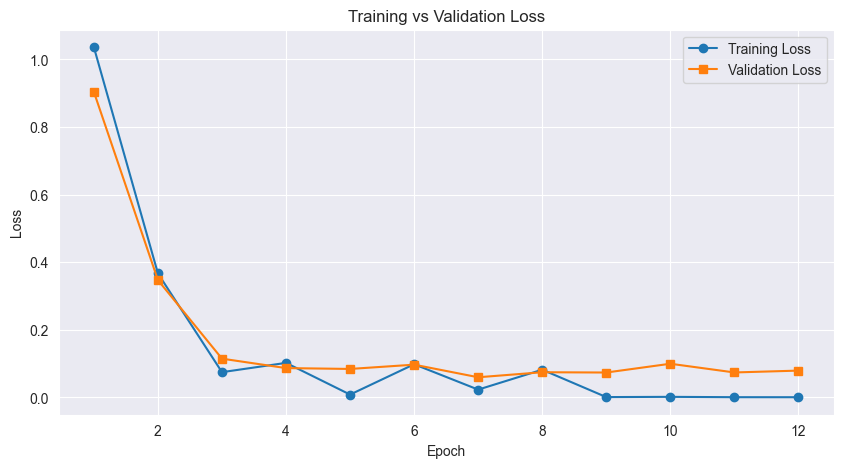

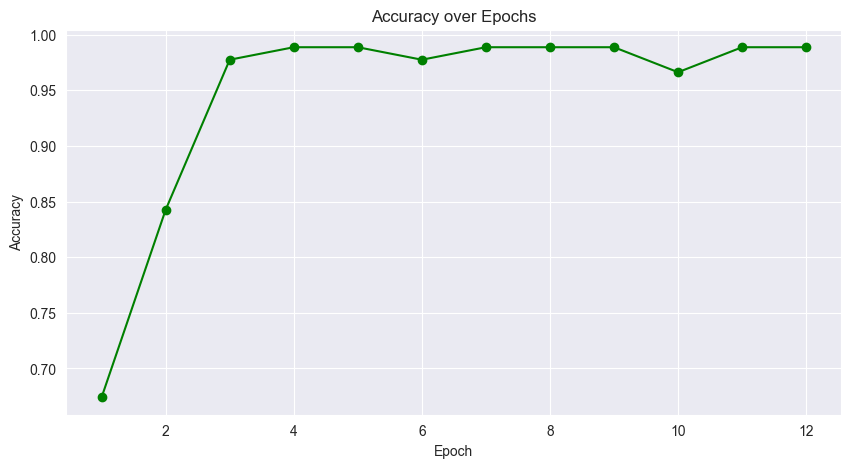

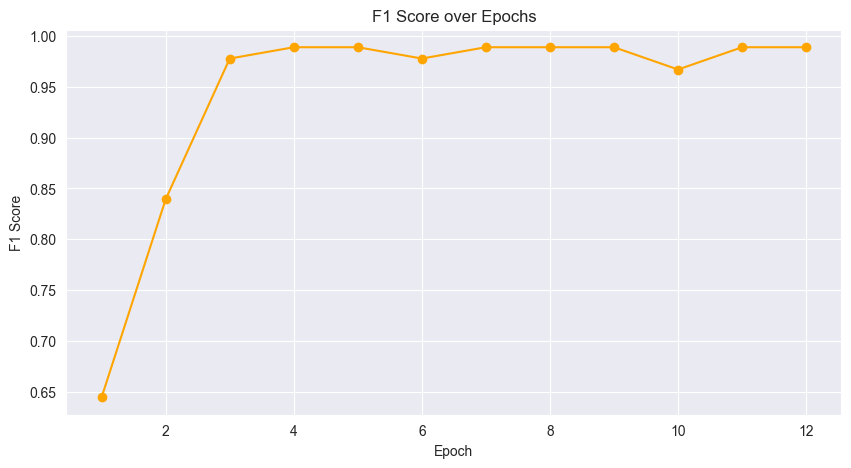

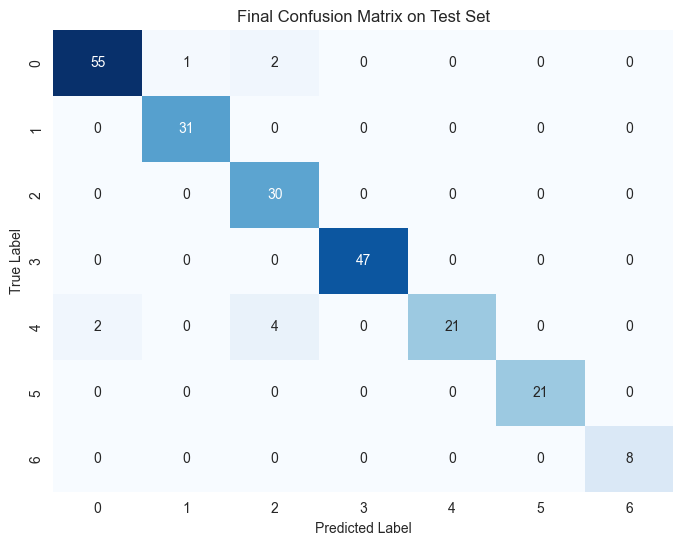

In [3]:
import matplotlib.pyplot as plt

# Données de votre entraînement
epochs = list(range(1, 13))
train_loss = [1.0358, 0.3666, 0.0747, 0.1022, 0.0084, 0.0981, 0.0231, 0.082, 0.001, 0.0017, 0.0007, 0.0006]
val_loss   = [0.90363, 0.34698, 0.114638, 0.086754, 0.084238, 0.096874, 0.059629, 0.074504, 0.073656, 0.099615, 0.07386, 0.079325]
accuracy   = [0.674157, 0.842697, 0.977528, 0.988764, 0.988764, 0.977528, 0.988764, 0.988764, 0.988764, 0.966292, 0.988764, 0.988764]
f1_score   = [0.644856, 0.839353, 0.977577, 0.988732, 0.988732, 0.977621, 0.988732, 0.988732, 0.988732, 0.966832, 0.988732, 0.988732]

# --- Courbe des pertes
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- Courbe de précision
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Accuracy', color='green', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.grid(True)
plt.show()

# --- Courbe du F1 Score
plt.figure(figsize=(10, 5))
plt.plot(epochs, f1_score, label='F1 Score', color='orange', marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.grid(True)
plt.show()

import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Matrice finale
conf_matrix = np.array([
    [55, 1, 2, 0, 0, 0, 0],
    [0, 31, 0, 0, 0, 0, 0],
    [0, 0, 30, 0, 0, 0, 0],
    [0, 0, 0, 47, 0, 0, 0],
    [2, 0, 4, 0, 21, 0, 0],
    [0, 0, 0, 0, 0, 21, 0],
    [0, 0, 0, 0, 0, 0, 8],
])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Final Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



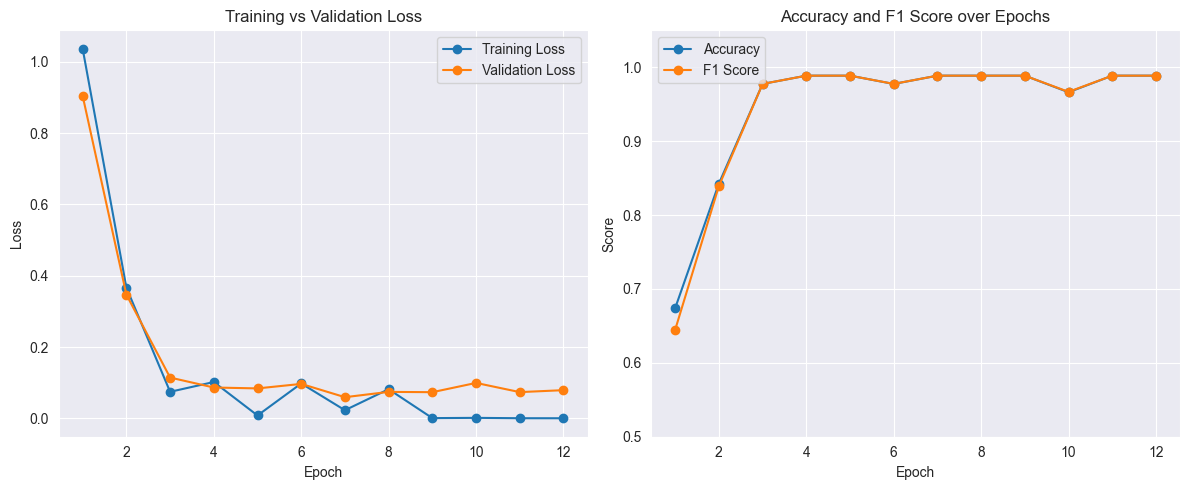

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Données des epochs
epochs = list(range(1, 13))

training_loss = [1.035800, 0.366600, 0.074700, 0.102200, 0.008400, 0.098100, 0.023100, 0.082000, 0.001000, 0.001700, 0.000700, 0.000600]
validation_loss = [0.903630, 0.346980, 0.114638, 0.086754, 0.084238, 0.096874, 0.059629, 0.074504, 0.073656, 0.099615, 0.073860, 0.079325]
accuracy = [0.674157, 0.842697, 0.977528, 0.988764, 0.988764, 0.977528, 0.988764, 0.988764, 0.988764, 0.966292, 0.988764, 0.988764]
f1_score = [0.644856, 0.839353, 0.977577, 0.988732, 0.988732, 0.977621, 0.988732, 0.988732, 0.988732, 0.966832, 0.988732, 0.988732]

# Tracer les courbes de perte
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# Tracer les courbes de Accuracy et F1-score
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.plot(epochs, f1_score, marker='o', label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score over Epochs')
plt.ylim(0.5, 1.05)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
